## Data Prep

In [ ]:
import pandas as pd
data = pd.read_csv('Cleaned__complete_data.csv', index_col=0, thousands = ',')
data.head(3)

,pension,Long_Dist_Income,"Agriculture, Forestry and Fishing (A) (%)",Construction (F) (%),"Financial, Real Estate, Administrative and Services (K,L,N,S) (%)","Industry (B,C,D,E) (%)","Public Service, Education and Health (O,P,Q) (%)","Wholesale, Transport and Accomodation (G,H,I) (%)",T1_1AGE0T,T6_1_CM_H,T6_5_PCH,T6_6_GSLA,T6_6_OP,T6_7_OTH,T6_8_UHH,T8_1_OTHM,T9_2_HJ,gross_income
0,15.8,35617.0,1.1,5.0,14.0,12.6,30.9,25.3,43,1,13,31,4,4,1.0,12,3,105943
1,20.4,31854.0,2.0,8.3,16.2,12.7,25.7,26.9,16,1,4,9,0,3,7.0,3,3,101740
2,17.0,43499.0,10.6,8.9,13.3,13.9,27.3,13.7,8,1,1,2,157,2,9.0,2,2,96130


In [ ]:
data.filter(regex='..')

,pension,Long_Dist_Income,"Agriculture, Forestry and Fishing (A) (%)",Construction (F) (%),"Financial, Real Estate, Administrative and Services (K,L,N,S) (%)","Industry (B,C,D,E) (%)","Public Service, Education and Health (O,P,Q) (%)","Wholesale, Transport and Accomodation (G,H,I) (%)",T1_1AGE0T,T6_1_CM_H,T6_5_PCH,T6_6_GSLA,T6_6_OP,T6_7_OTH,T6_8_UHH,T8_1_OTHM,T9_2_HJ,gross_income
0,15.8,35617.0,1.1,5.0,14.0,12.6,30.9,25.3,43,1,13,31,4,4,1.0,12,3,105943
1,20.4,31854.0,2.0,8.3,16.2,12.7,25.7,26.9,16,1,4,9,0,3,7.0,3,3,101740
2,17.0,43499.0,10.6,8.9,13.3,13.9,27.3,13.7,8,1,1,2,157,2,9.0,2,2,96130
3,14.0,33827.0,6.6,10.5,9.8,12.5,24.7,23.7,14,3,20,3,152,3,9.0,0,4,92189
4,18.8,33790.0,12.1,10.2,11.0,14.6,23.2,15.4,4,0,2,0,90,1,0.0,0,0,91199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,15.3,39501.0,14.1,6.7,8.2,10.2,33.5,20.6,14,0,6,139,14,2,3.0,0,4,18314
3405,14.3,30508.0,12.9,10.1,7.9,11.3,26.3,24.1,7,2,21,131,4,3,4.0,0,6,17144
3406,13.9,37411.0,11.3,6.2,9.7,10.0,33.6,24.9,19,2,3,169,19,0,5.0,3,3,16667
3407,14.8,40420.0,6.4,5.9,9.5,12.6,30.2,28.1,11,0,0,134,53,1,0.0,0,6,15687


Isolate target variable, 'gross income'.

In [ ]:
y = data[['gross_income']]
y.head(3)

,gross_income
0,105943
1,101740
2,96130


In [ ]:
X = data.drop('gross_income', axis=1)
X.head(3)

,pension,Long_Dist_Income,"Agriculture, Forestry and Fishing (A) (%)",Construction (F) (%),"Financial, Real Estate, Administrative and Services (K,L,N,S) (%)","Industry (B,C,D,E) (%)","Public Service, Education and Health (O,P,Q) (%)","Wholesale, Transport and Accomodation (G,H,I) (%)",T1_1AGE0T,T6_1_CM_H,T6_5_PCH,T6_6_GSLA,T6_6_OP,T6_7_OTH,T6_8_UHH,T8_1_OTHM,T9_2_HJ
0,15.8,35617.0,1.1,5.0,14.0,12.6,30.9,25.3,43,1,13,31,4,4,1.0,12,3
1,20.4,31854.0,2.0,8.3,16.2,12.7,25.7,26.9,16,1,4,9,0,3,7.0,3,3
2,17.0,43499.0,10.6,8.9,13.3,13.9,27.3,13.7,8,1,1,2,157,2,9.0,2,2


Ensure data is numeric

In [ ]:
X.dtypes.value_counts()

,count
float64,9
int64,8


## PCA

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
X.fillna(X.mean(),inplace=True)

In [ ]:
X['Long_Dist_Income'] = X['Long_Dist_Income'].replace('..',
    np.mean(pd.to_numeric(X['Long_Dist_Income'], errors='coerce')))

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
X.isin(['..']).any()

,0
pension,False
Long_Dist_Income,False
"Agriculture, Forestry and Fishing (A) (%)",False
Construction (F) (%),False
"Financial, Real Estate, Administrative and Services (K,L,N,S) (%)",False
"Industry (B,C,D,E) (%)",False
"Public Service, Education and Health (O,P,Q) (%)",False
"Wholesale, Transport and Accomodation (G,H,I) (%)",False
T1_1AGE0T,False
T6_1_CM_H,False


In [ ]:
X.isna().any().any()

False

##Scaling Data

Data is scaled prior to PCA.

In [ ]:
scaler = StandardScaler()
scale = scaler.fit_transform(X)

In [ ]:
columns = X.columns

##PCA

In [ ]:
pca01 = PCA(n_components=10)
principComp = pca01.fit_transform(scale)

In [ ]:
import matplotlib.pyplot as plt

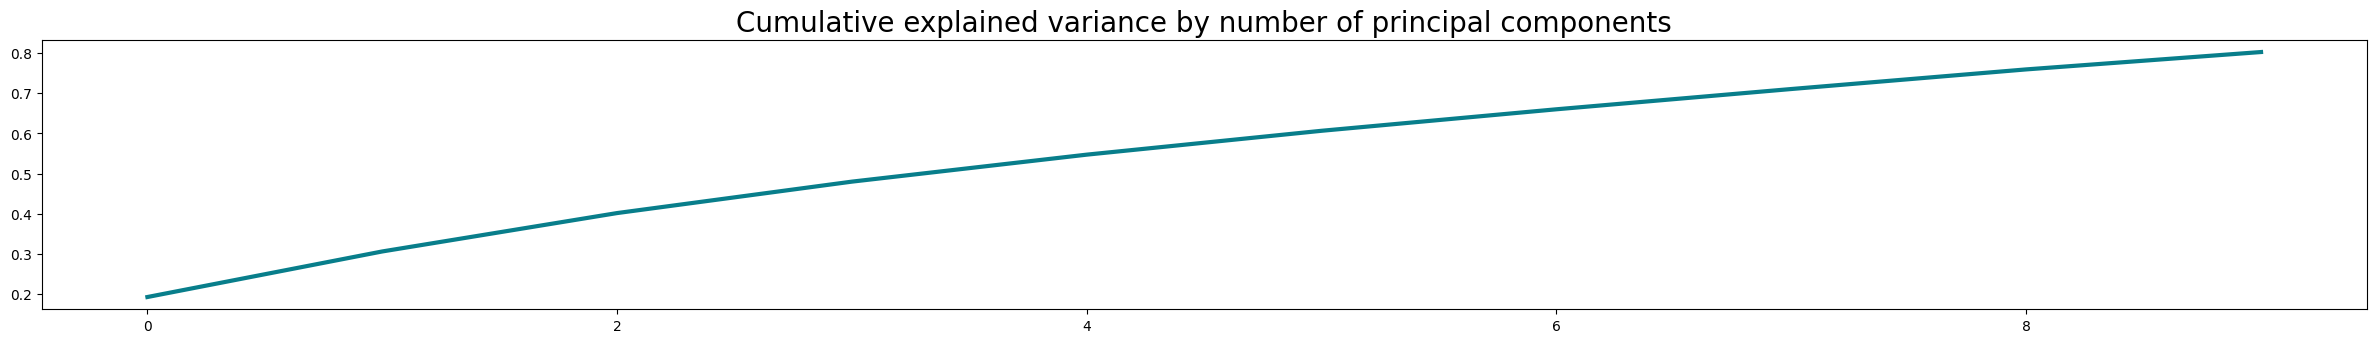

In [ ]:
plt.plot(pca01.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

The graph above shows that 10 principal componenents explain ~ 80% of the data.

In [ ]:
pca01

PCA(n_components=10)

In [ ]:
pca01.explained_variance_ratio_

array([0.1921309 , 0.11366178, 0.09574558, 0.07840425, 0.06730825,
       0.05952912, 0.05360417, 0.0505528 , 0.04890836, 0.04333395])

In [ ]:
#Cumulative variablility explained by each component
np.cumsum(pca01.explained_variance_ratio_)

array([0.1921309 , 0.30579267, 0.40153826, 0.47994251, 0.54725076,
       0.60677988, 0.66038405, 0.71093685, 0.75984521, 0.80317916])

The loadings dataframe below shows each variable's contribution to each Principal Component

In [ ]:
loadings = pca01.components_
num_pc = pca01.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
pension,-0.341426,0.256753,-0.174558,-0.140275,0.060207,0.002569,0.127843,0.090801,-0.037684,-0.001233
Long_Dist_Income,0.104263,-0.359732,0.005968,0.498894,0.007589,-0.038014,0.036563,-0.057026,0.167229,-0.374604
"Agriculture, Forestry and Fishing (A) (%)",-0.415695,0.003069,0.144427,0.042077,0.140660,0.086559,0.173263,0.265194,-0.128224,0.105502
Construction (F) (%),-0.333762,0.177640,0.170616,-0.046604,0.094527,0.029172,0.321949,0.224479,-0.059840,-0.182796
"Financial, Real Estate, Administrative and Services (K,L,N,S) (%)",0.323123,-0.374483,-0.055048,-0.310271,-0.050670,0.018335,0.276944,0.109951,0.016223,-0.272969
"Industry (B,C,D,E) (%)",-0.170633,0.164247,0.361726,0.096257,-0.496101,-0.237272,-0.291113,-0.073109,0.364832,0.082620
"Public Service, Education and Health (O,P,Q) (%)",0.057423,0.141590,-0.491372,0.487241,0.193868,0.120755,-0.178355,-0.108363,-0.182520,0.283637
"Wholesale, Transport and Accomodation (G,H,I) (%)",0.192296,0.291703,0.088574,-0.425626,0.118282,-0.005838,-0.270018,-0.449064,-0.110707,-0.016101
T1_1AGE0T,0.420242,0.111209,0.153316,0.011354,-0.031256,0.001681,0.093740,0.176745,-0.131026,0.081968


In [ ]:
loadings_df.to_csv('PC_variables.csv')

The above dataframe is visualised for each PC

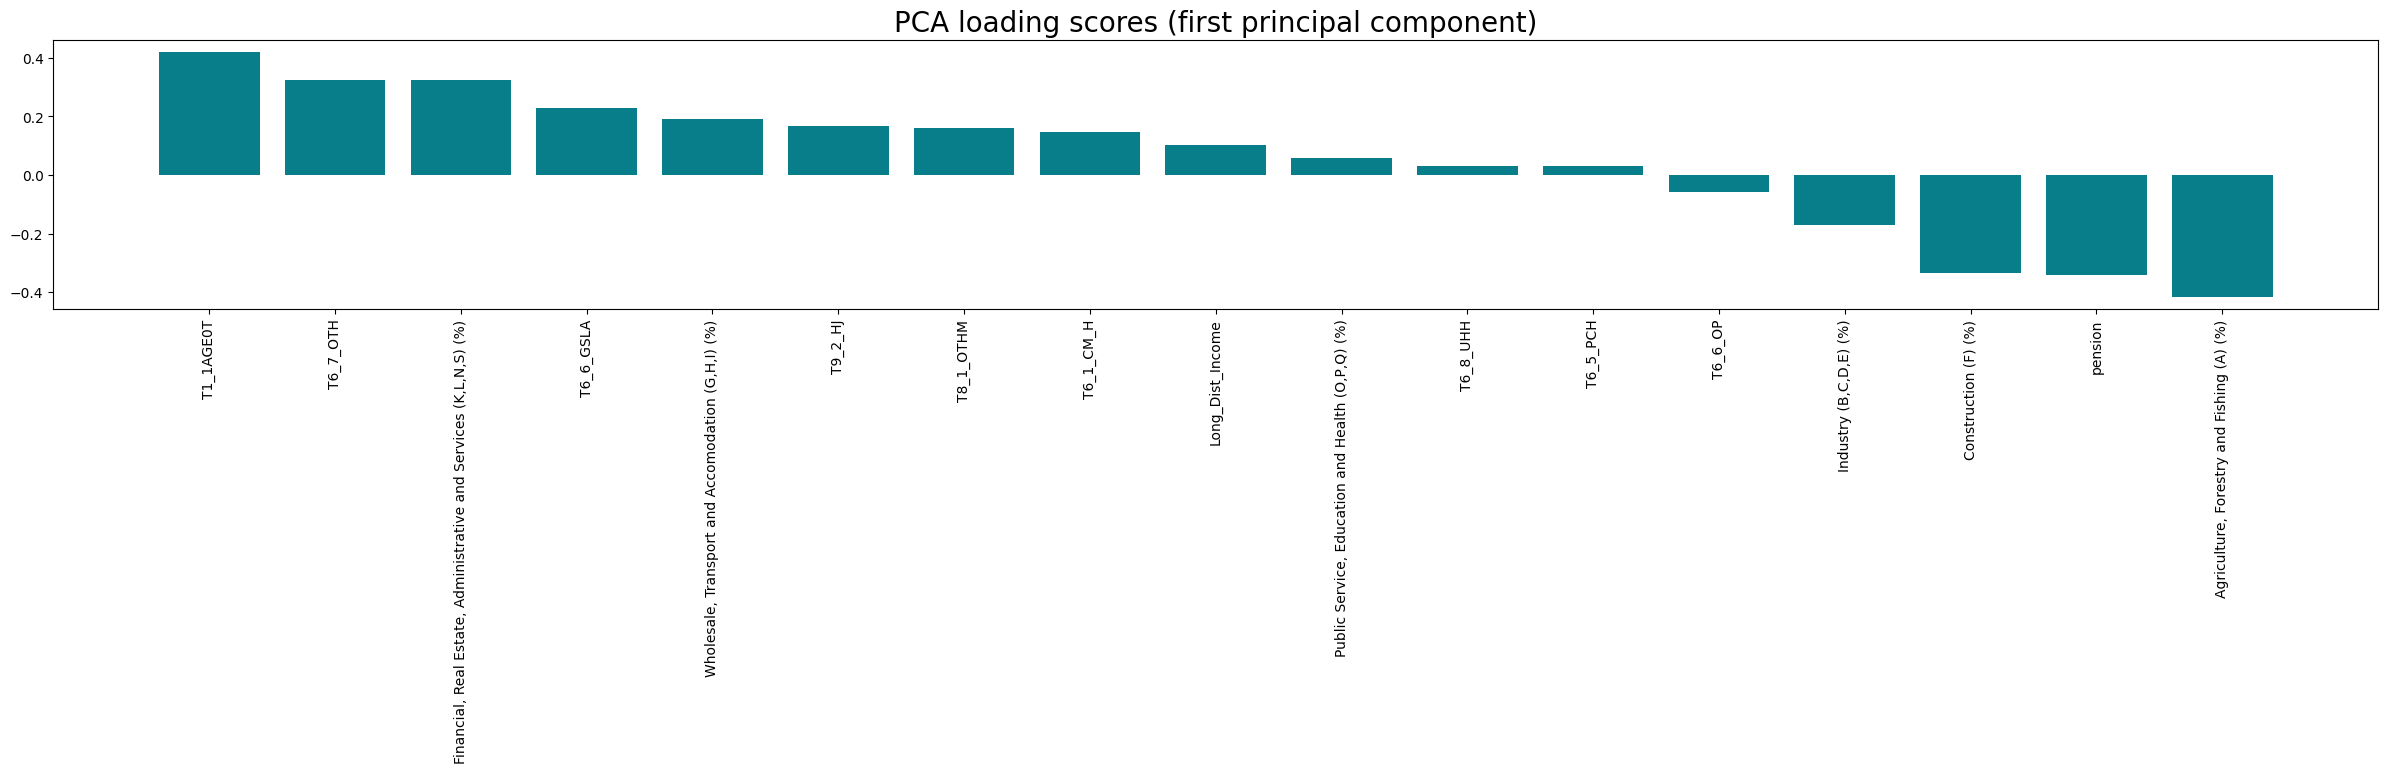

In [ ]:
pc1_loadings = loadings_df.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
plt.rcParams["figure.figsize"] = [30, 3.50]
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

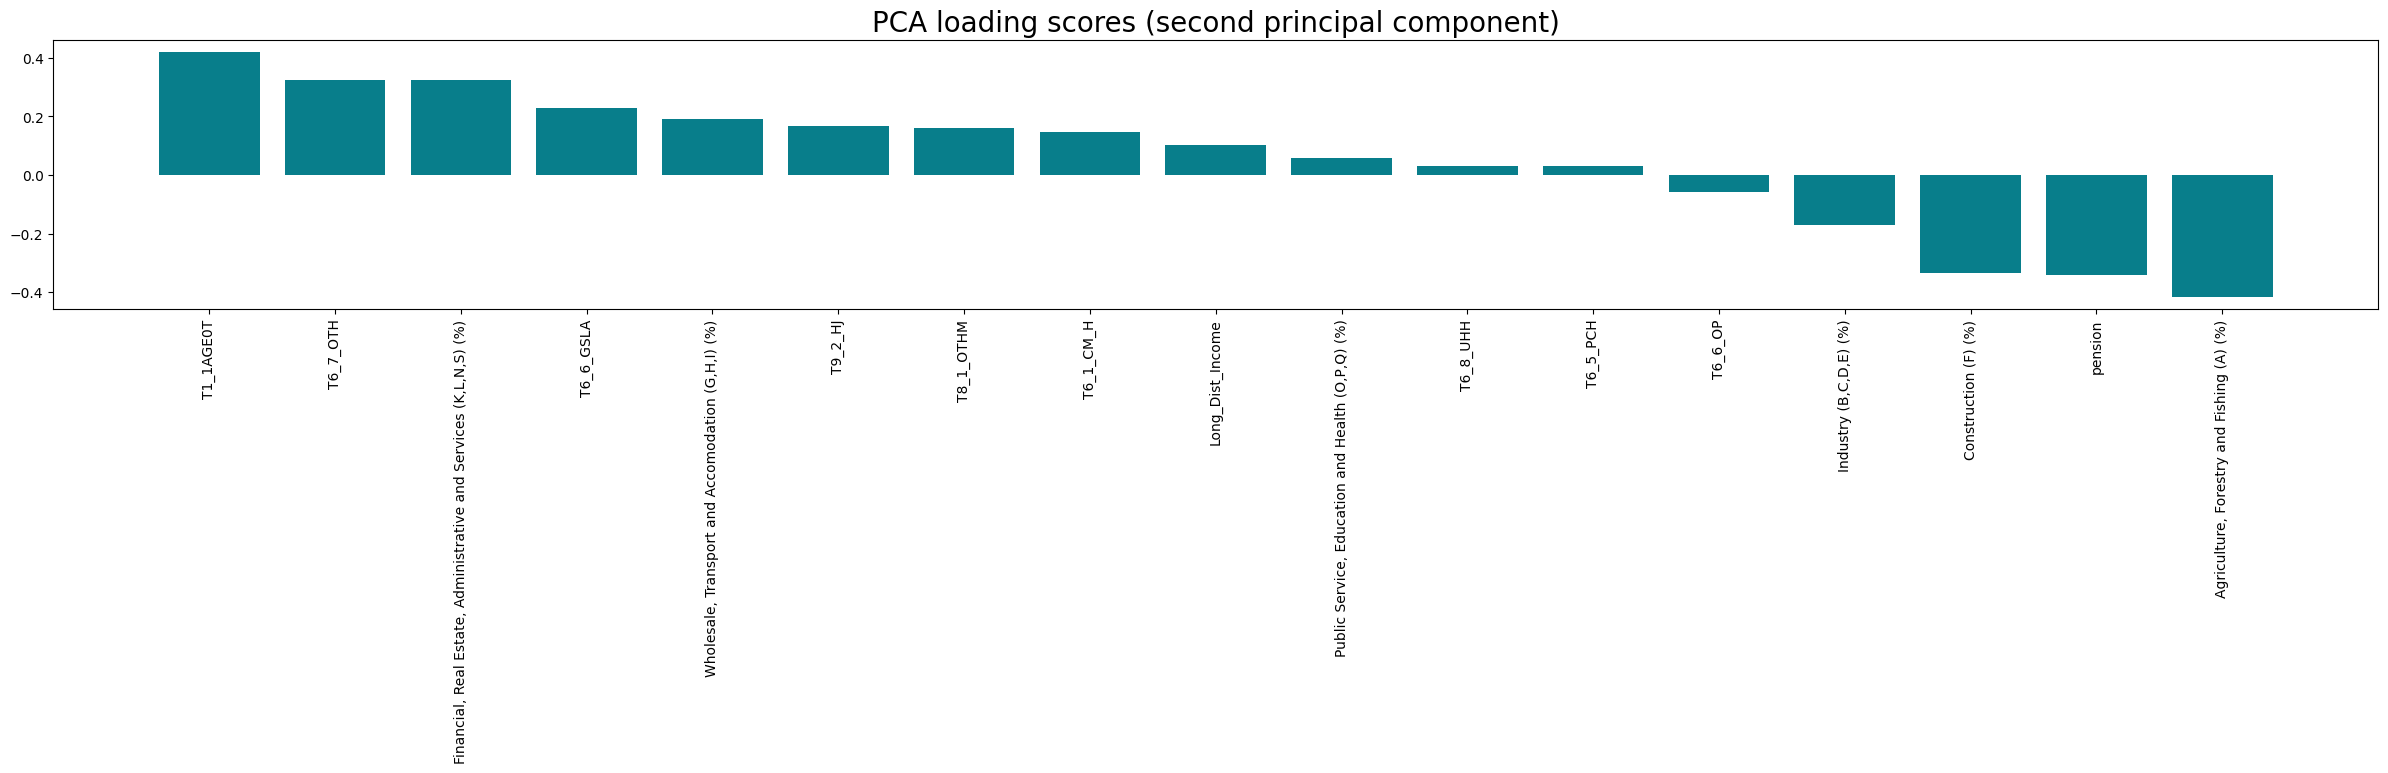

In [ ]:
pc2_loadings = loadings_df.sort_values(by='PC1', ascending=False)[['PC1']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (second principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

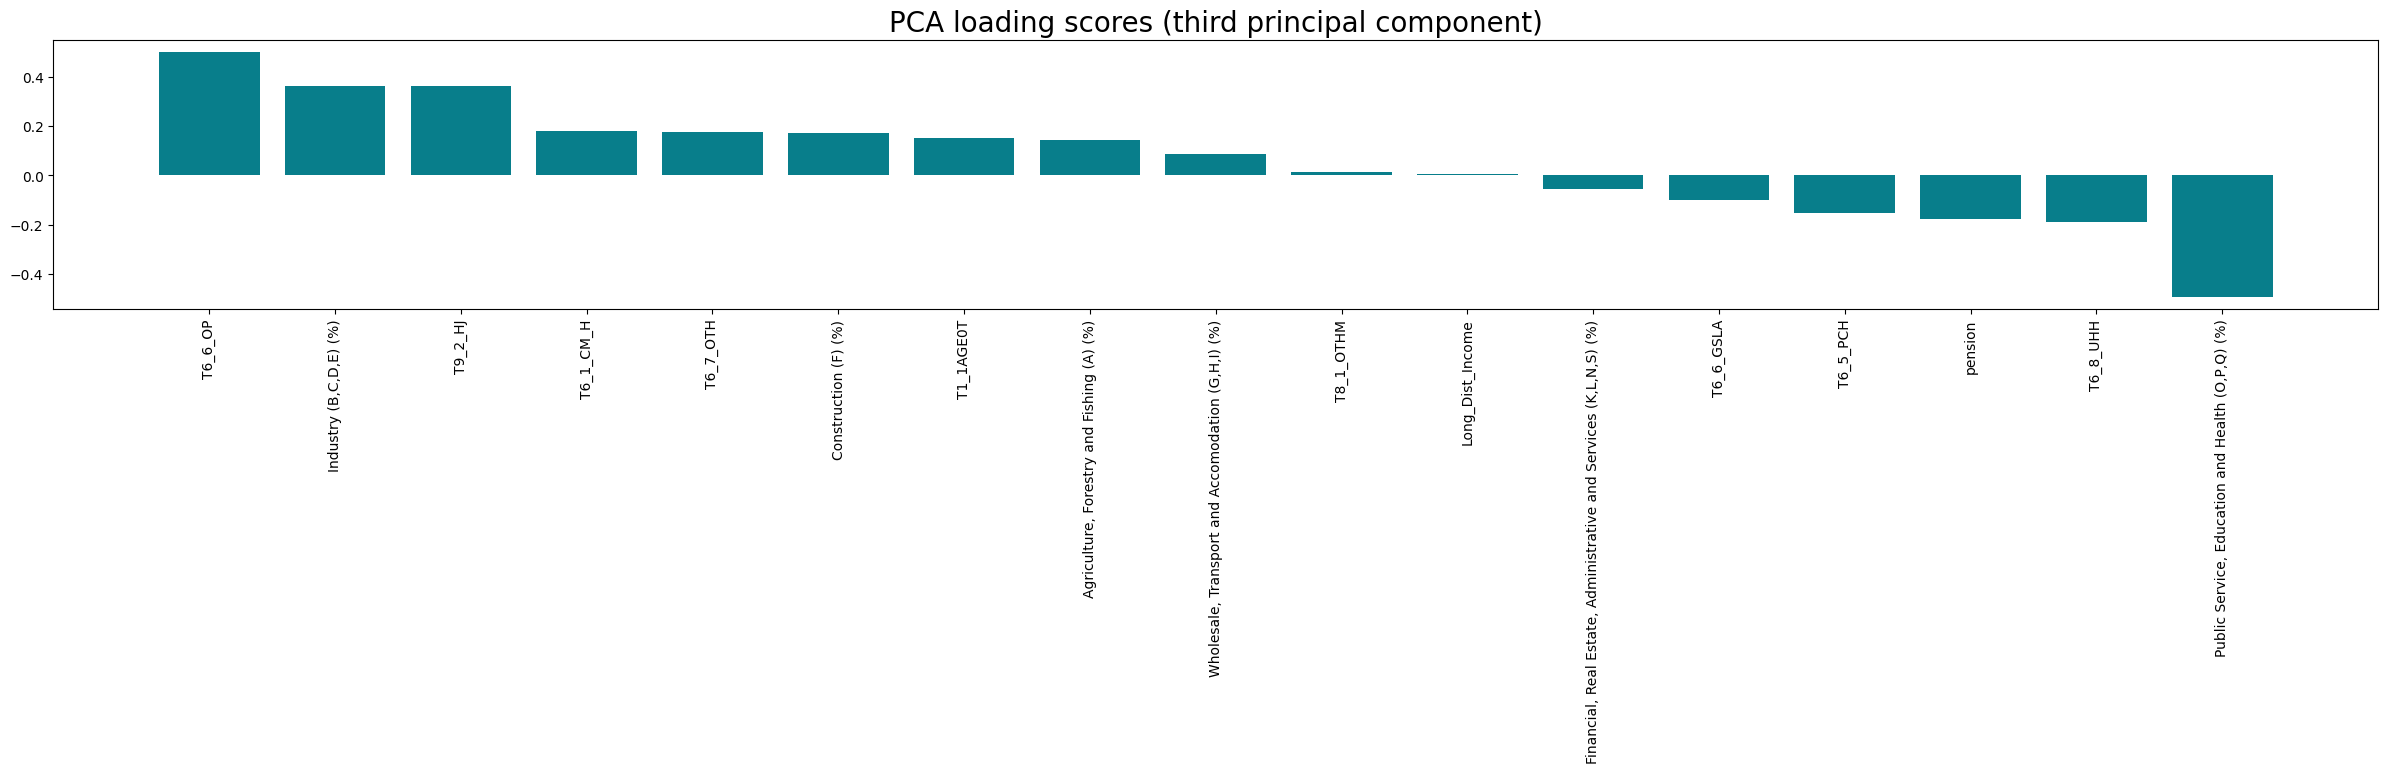

In [ ]:
pc3_loadings = loadings_df.sort_values(by='PC3', ascending=False)[['PC3']]
pc3_loadings = pc3_loadings.reset_index()
pc3_loadings.columns = ['Attribute', 'CorrelationWithPC3']

plt.bar(x=pc3_loadings['Attribute'], height=pc3_loadings['CorrelationWithPC3'], color='#087E8B')
plt.title('PCA loading scores (third principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

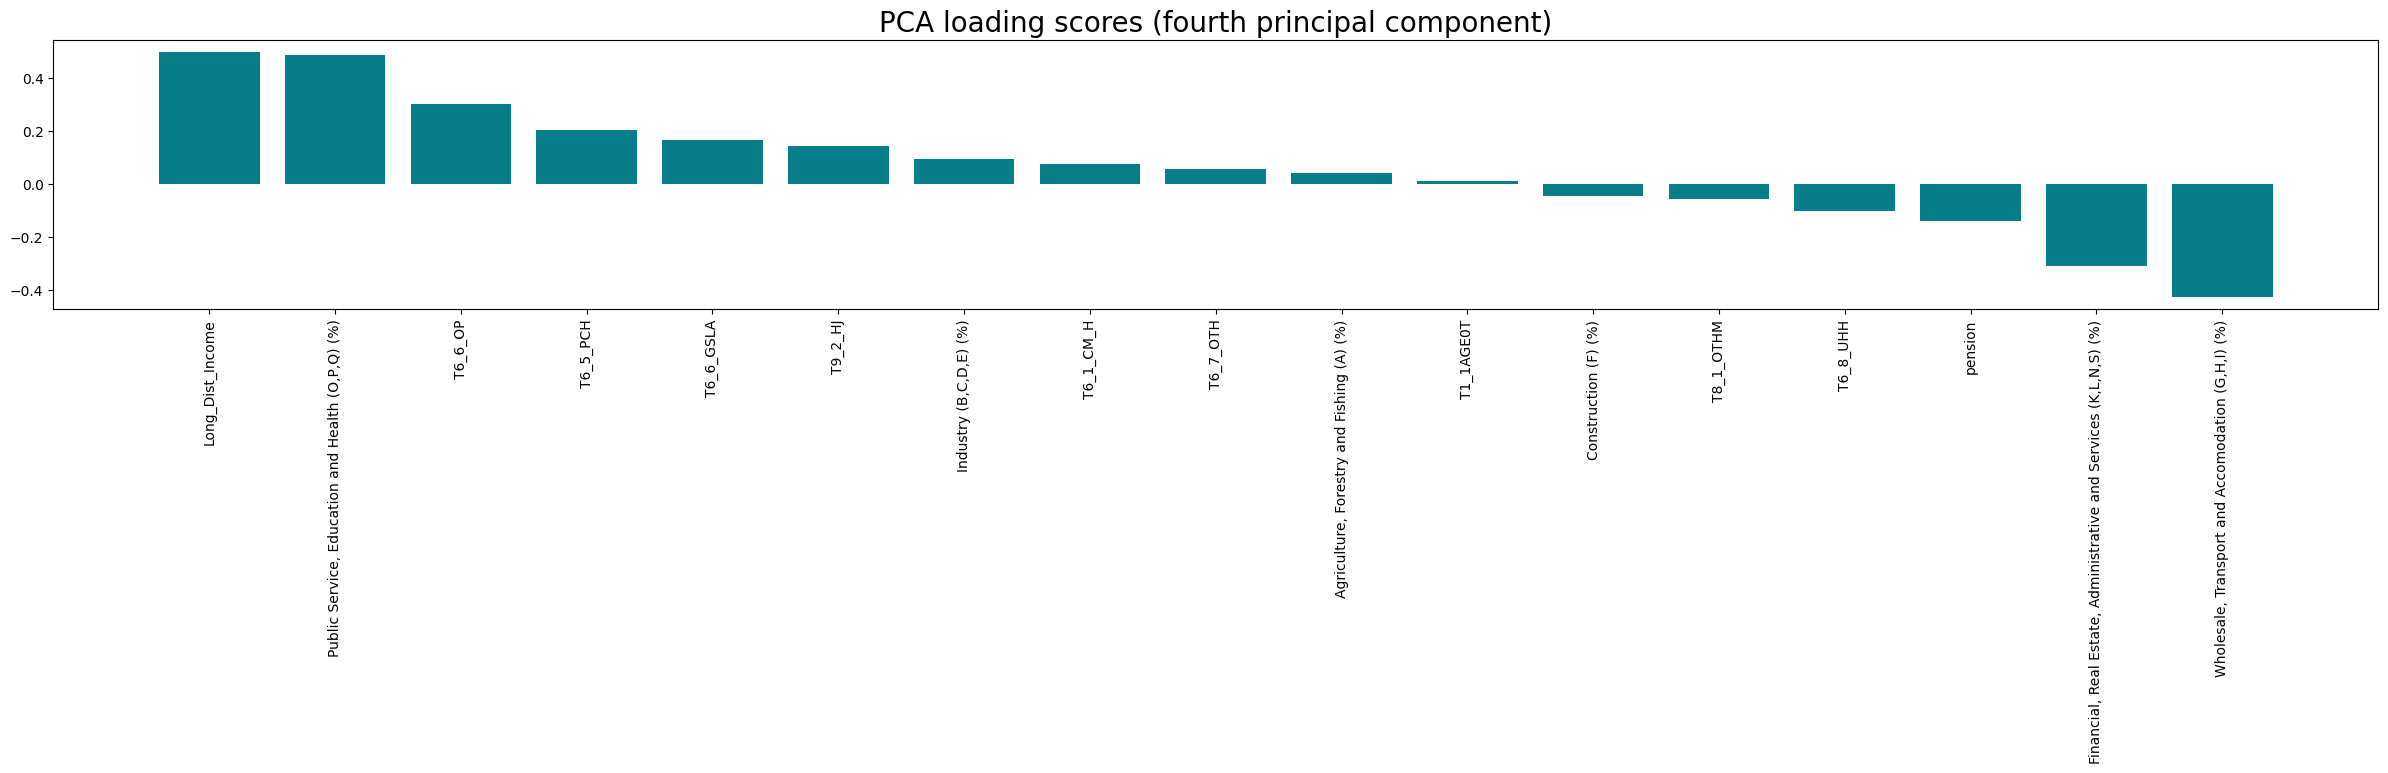

In [ ]:
pc4_loadings = loadings_df.sort_values(by='PC4', ascending=False)[['PC4']]
pc4_loadings = pc4_loadings.reset_index()
pc4_loadings.columns = ['Attribute', 'CorrelationWithPC4']

plt.bar(x=pc4_loadings['Attribute'], height=pc4_loadings['CorrelationWithPC4'], color='#087E8B')
plt.title('PCA loading scores (fourth principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

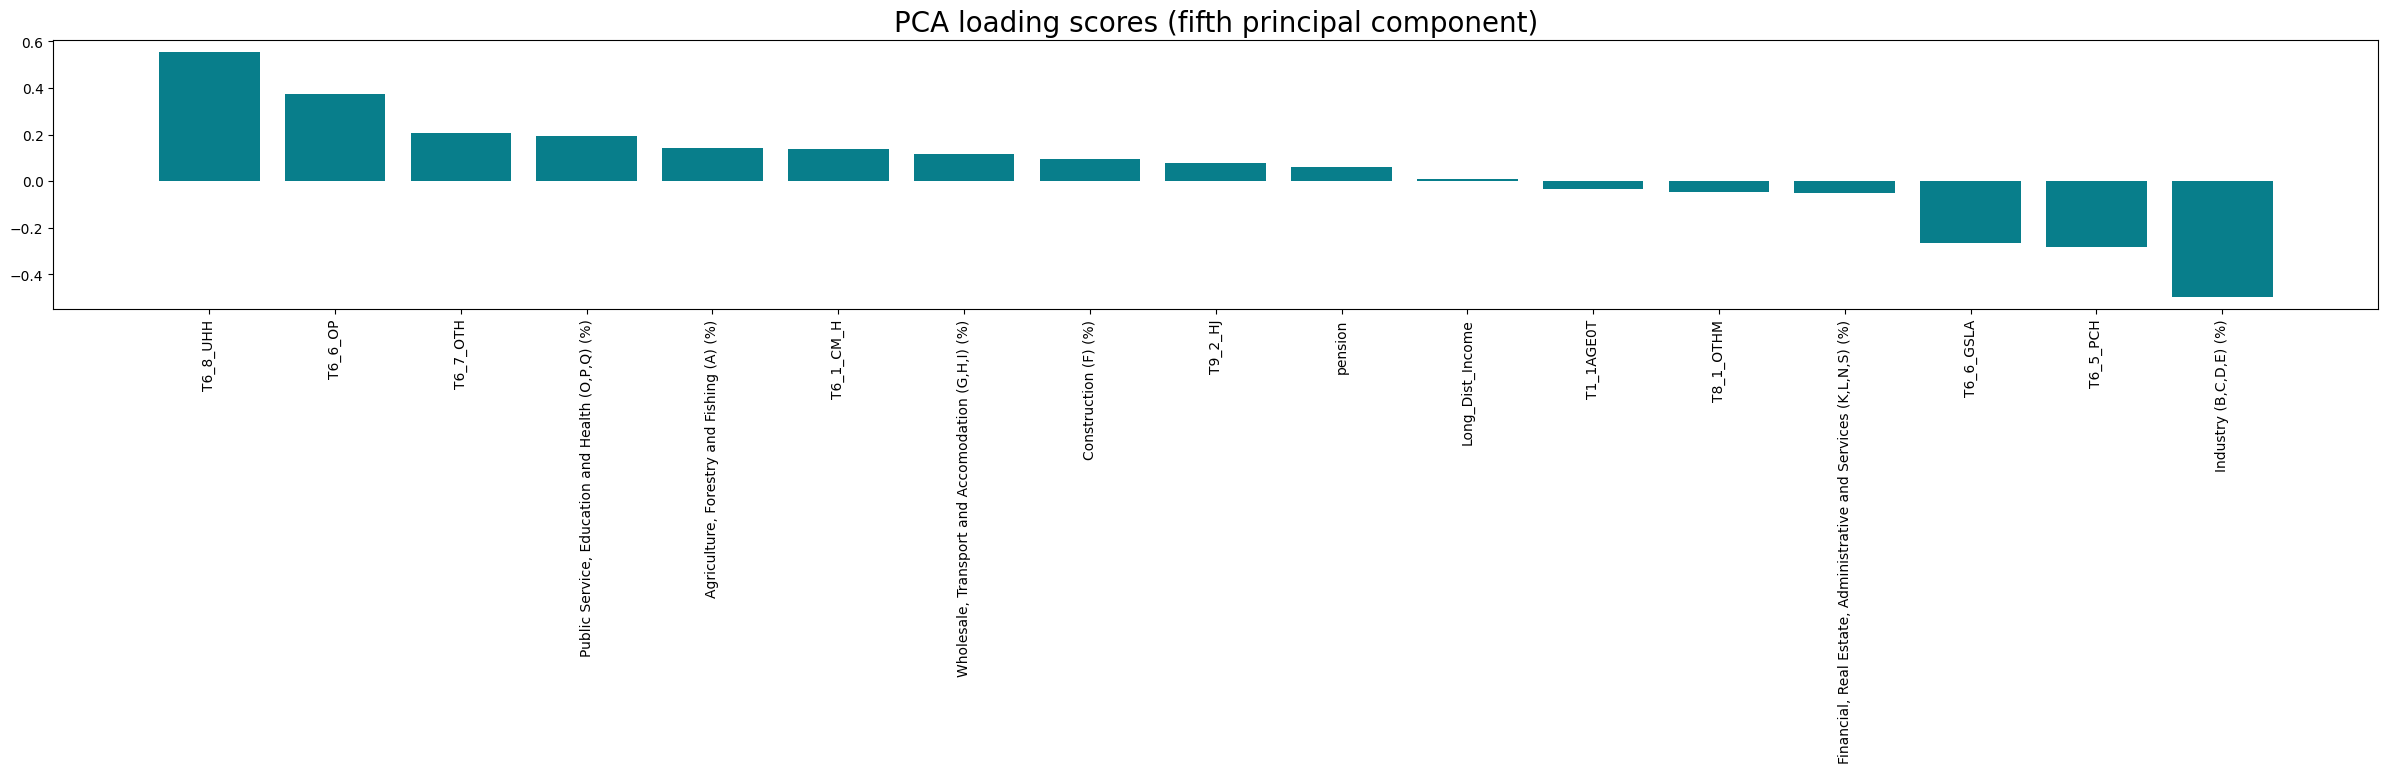

In [ ]:
pc5_loadings = loadings_df.sort_values(by='PC5', ascending=False)[['PC5']]
pc5_loadings = pc5_loadings.reset_index()
pc5_loadings.columns = ['Attribute', 'CorrelationWithPC5']

plt.bar(x=pc5_loadings['Attribute'], height=pc5_loadings['CorrelationWithPC5'], color='#087E8B')
plt.title('PCA loading scores (fifth principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=320ee23bc345774c8043d84e095de0196d8f195060a22fdc4647b7b6e8fb7f5f
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [ ]:
pca01.singular_values_

array([98.85618779, 76.03481246, 69.78540883, 63.15024904, 58.5112549 ,
       55.026258  , 52.21611141, 50.70816311, 49.87659353, 46.94825032])

In [ ]:
pca01.get_feature_names_out(input_features=None)

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9'], dtype=object)

In [ ]:
pca01.score(X, y=None)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


-1080517592.030918

In [ ]:
pca01.score_samples(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([-8.88750448e+08, -7.10970723e+08, -1.32362816e+09, ...,
       -9.80808215e+08, -1.14443790e+09, -7.83307396e+08])

In [ ]:
pca01.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[  3744.27536833, -12775.43042625,    207.06242472, ...,
         -2021.87510261,   5949.43771302, -13335.97884179],
       [  3331.58720823, -11434.74115564,    183.1425546 , ...,
         -1819.00972668,   5323.27643076, -11931.87874656],
       [  4524.83414732, -15640.38299456,    330.67935817, ...,
         -2490.16033922,   7283.06509501, -16299.14526488],
       ...,
       [  3944.19087091, -13382.50099276,    207.76622027, ...,
         -2099.90078854,   6251.89465847, -13975.76306323],
       [  4246.14466536, -14480.69289378,    249.26073861, ...,
         -2286.78952712,   6754.17925676, -15110.87648882],
       [  3493.02759717, -11992.02834315,    227.04803091, ...,
         -1897.38011646,   5594.15781012, -12509.13236422]])

In [ ]:
X2 = pca01.transform(scale)
X2

array([[ 1.65889576,  0.30530469, -0.61986767, ..., -0.50067382,
        -0.33425879,  0.37341124],
       [ 0.45259057,  0.28099928, -0.23996964, ..., -0.76640225,
        -0.4780709 , -0.10842691],
       [-1.11496482, -1.34329906,  1.08672922, ...,  0.439493  ,
         0.26782329, -0.40615457],
       ...,
       [ 0.90213305,  1.51506693, -0.96567134, ...,  0.08594773,
        -0.75247333,  1.5334881 ],
       [ 1.03569761,  1.24999455, -0.07299916, ..., -0.73884353,
        -0.95369483,  0.77297152],
       [-1.60976881,  0.90292489, -0.16002556, ...,  0.46058735,
        -0.39699067,  1.43133894]])

In [ ]:
df = pd.DataFrame(data=X2, columns=['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth', 'Ninth', 'Tenth'])
df

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155
3,-0.503597,0.376286,1.708173,-0.760714,1.106229,0.332180,-0.290916,-0.863985,-0.265213,-0.135145
4,-1.990278,-0.588371,0.811416,-0.787445,0.242310,0.129195,0.261898,0.537141,0.044215,0.142346
...,...,...,...,...,...,...,...,...,...,...
2987,0.052193,1.073471,-0.879057,0.648652,-0.331555,-0.578063,0.570506,0.583443,-1.026981,1.275368
2988,-0.205536,2.078856,0.162742,-0.866625,-0.455447,-0.448621,0.971416,0.372389,-1.100953,1.040353
2989,0.902133,1.515067,-0.965671,0.104430,-0.507575,-0.440927,0.537016,0.085948,-0.752473,1.533488
2990,1.035698,1.249995,-0.072999,-0.164216,-0.418337,-0.751090,-0.363675,-0.738844,-0.953695,0.772972


In [ ]:
data[['gross_income']]

,gross_income
0,105943
1,101740
2,96130
3,92189
4,91199
...,...
3403,18314
3405,17144
3406,16667
3407,15687


In [ ]:
data = data.reset_index(drop=True)

A dataframe is created containing all data restricted to the 10 principal components along with the target variable gross income.

In [ ]:
final_df = pd.concat([df, data[['gross_income']]], axis=1)
final_df

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,gross_income
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411,105943
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427,101740
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155,96130
3,-0.503597,0.376286,1.708173,-0.760714,1.106229,0.332180,-0.290916,-0.863985,-0.265213,-0.135145,92189
4,-1.990278,-0.588371,0.811416,-0.787445,0.242310,0.129195,0.261898,0.537141,0.044215,0.142346,91199
...,...,...,...,...,...,...,...,...,...,...,...
2987,0.052193,1.073471,-0.879057,0.648652,-0.331555,-0.578063,0.570506,0.583443,-1.026981,1.275368,18314
2988,-0.205536,2.078856,0.162742,-0.866625,-0.455447,-0.448621,0.971416,0.372389,-1.100953,1.040353,17144
2989,0.902133,1.515067,-0.965671,0.104430,-0.507575,-0.440927,0.537016,0.085948,-0.752473,1.533488,16667
2990,1.035698,1.249995,-0.072999,-0.164216,-0.418337,-0.751090,-0.363675,-0.738844,-0.953695,0.772972,15687


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
target = final_df['gross_income']

In [ ]:
xs = X2[:,3]
ys = X2[:,4]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

In [ ]:
df = pd.DataFrame(pca01.components_, columns=columns)
df

,pension,Long_Dist_Income,"Agriculture, Forestry and Fishing (A) (%)",Construction (F) (%),"Financial, Real Estate, Administrative and Services (K,L,N,S) (%)","Industry (B,C,D,E) (%)","Public Service, Education and Health (O,P,Q) (%)","Wholesale, Transport and Accomodation (G,H,I) (%)",T1_1AGE0T,T6_1_CM_H,T6_5_PCH,T6_6_GSLA,T6_6_OP,T6_7_OTH,T6_8_UHH,T8_1_OTHM,T9_2_HJ
0,-0.341426,0.104263,-0.415695,-0.333762,0.323123,-0.170633,0.057423,0.192296,0.420242,0.147693,0.031812,0.228031,-0.057690,0.324498,0.031995,0.161138,0.165880
1,0.256753,-0.359732,0.003069,0.177640,-0.374483,0.164247,0.141590,0.291703,0.111209,0.173095,0.434534,0.328934,-0.057437,0.109323,0.261320,0.134944,0.244248
2,-0.174558,0.005968,0.144427,0.170616,-0.055048,0.361726,-0.491372,0.088574,0.153316,0.181731,-0.152855,-0.100747,0.499706,0.175935,-0.188556,0.012381,0.360478
3,-0.140275,0.498894,0.042077,-0.046604,-0.310271,0.096257,0.487241,-0.425626,0.011354,0.076917,0.203052,0.164614,0.301588,0.056585,-0.102045,-0.057963,0.145214
4,0.060207,0.007589,0.140660,0.094527,-0.050670,-0.496101,0.193868,0.118282,-0.031256,0.140424,-0.281457,-0.264033,0.372186,0.208248,0.554809,-0.045959,0.076784
5,0.002569,-0.038014,0.086559,0.029172,0.018335,-0.237272,0.120755,-0.005838,0.001681,0.434623,0.075249,-0.292412,-0.025091,-0.359207,-0.301502,0.635315,0.121243
6,0.127843,0.036563,0.173263,0.321949,0.276944,-0.291113,-0.178355,-0.270018,0.093740,0.530629,0.127349,0.261354,-0.179037,0.059516,-0.103238,-0.401663,-0.004257
7,0.090801,-0.057026,0.265194,0.224479,0.109951,-0.073109,-0.108363,-0.449064,0.176745,-0.361360,-0.112559,0.233216,-0.071123,0.329794,0.090492,0.534318,-0.023732
8,-0.037684,0.167229,-0.128224,-0.059840,0.016223,0.364832,-0.182520,-0.110707,-0.131026,0.430951,0.043644,0.014075,0.063400,0.057751,0.407926,0.245489,-0.576754
9,-0.001233,-0.374604,0.105502,-0.182796,-0.272969,0.082620,0.283637,-0.016101,0.081968,0.262891,-0.576065,0.201726,-0.041301,0.204004,-0.314538,-0.051596,-0.244508


##PCA Viz to outline feature contributions.

<Figure size 3000x350 with 0 Axes>

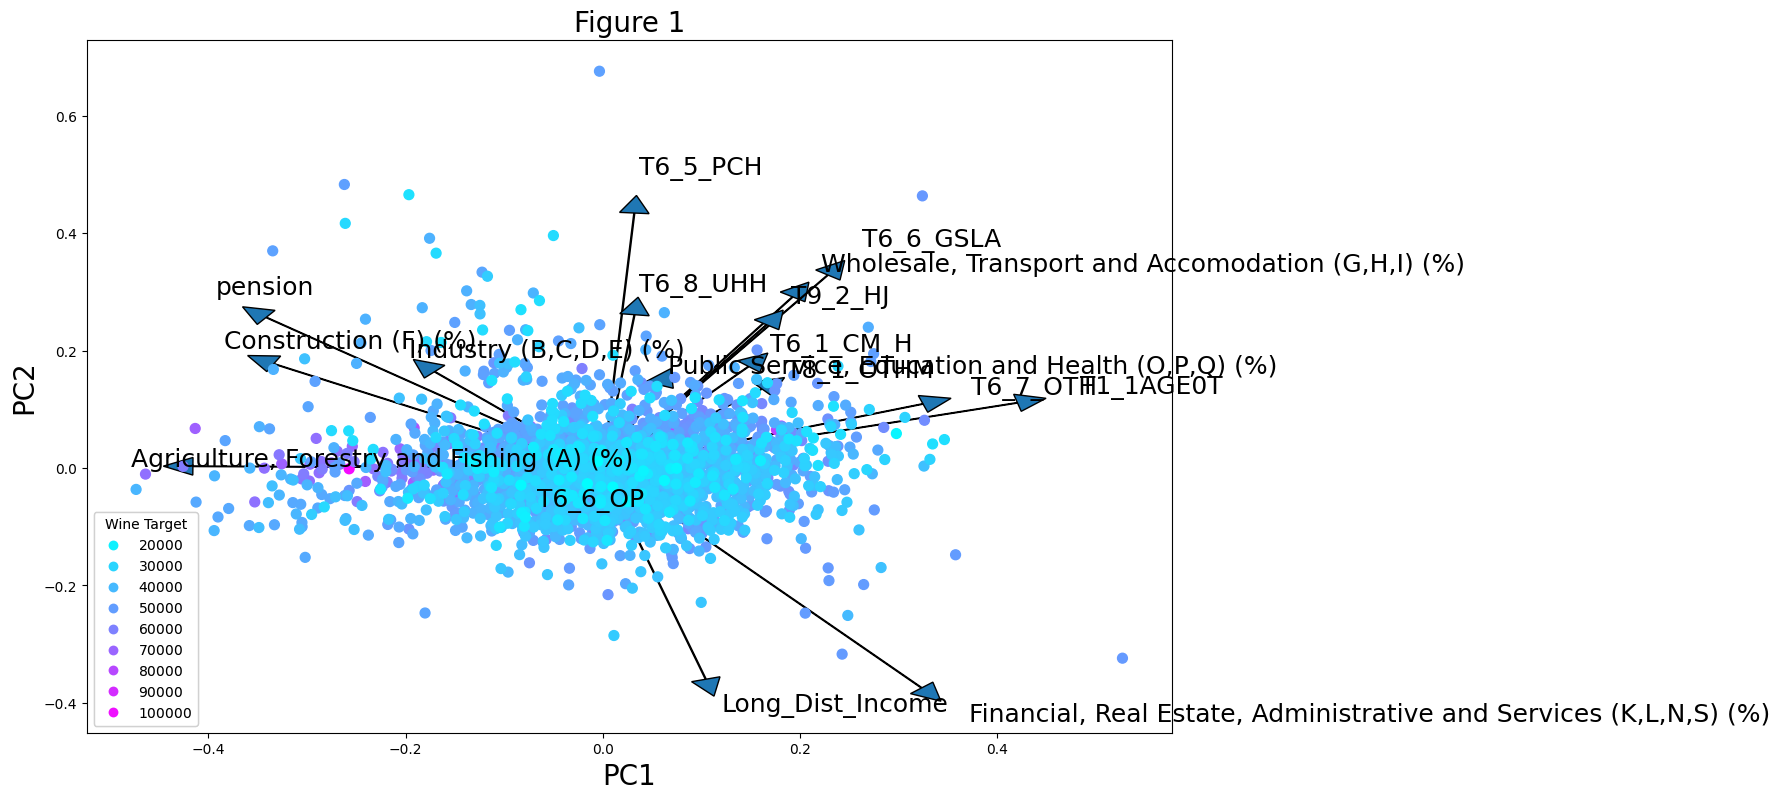

<Figure size 3000x350 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(14, 9))
for i, feature in enumerate(X.columns):
  ax.arrow(0, 0, pca01.components_[0, i],
             pca01.components_[1, i],
             head_width=0.03,
             head_length=0.03)
  ax.text(pca01.components_[0, i] * 1.15,
            pca01.components_[1, i] * 1.15,
            feature, fontsize = 18)

scatter = ax.scatter(xs * scalex,ys * scaley,
                     c=target,
                     s=50,
                     cmap='cool')

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Wine Target")
ax.add_artist(legend1)
plt.figure()

<Figure size 3000x350 with 0 Axes>

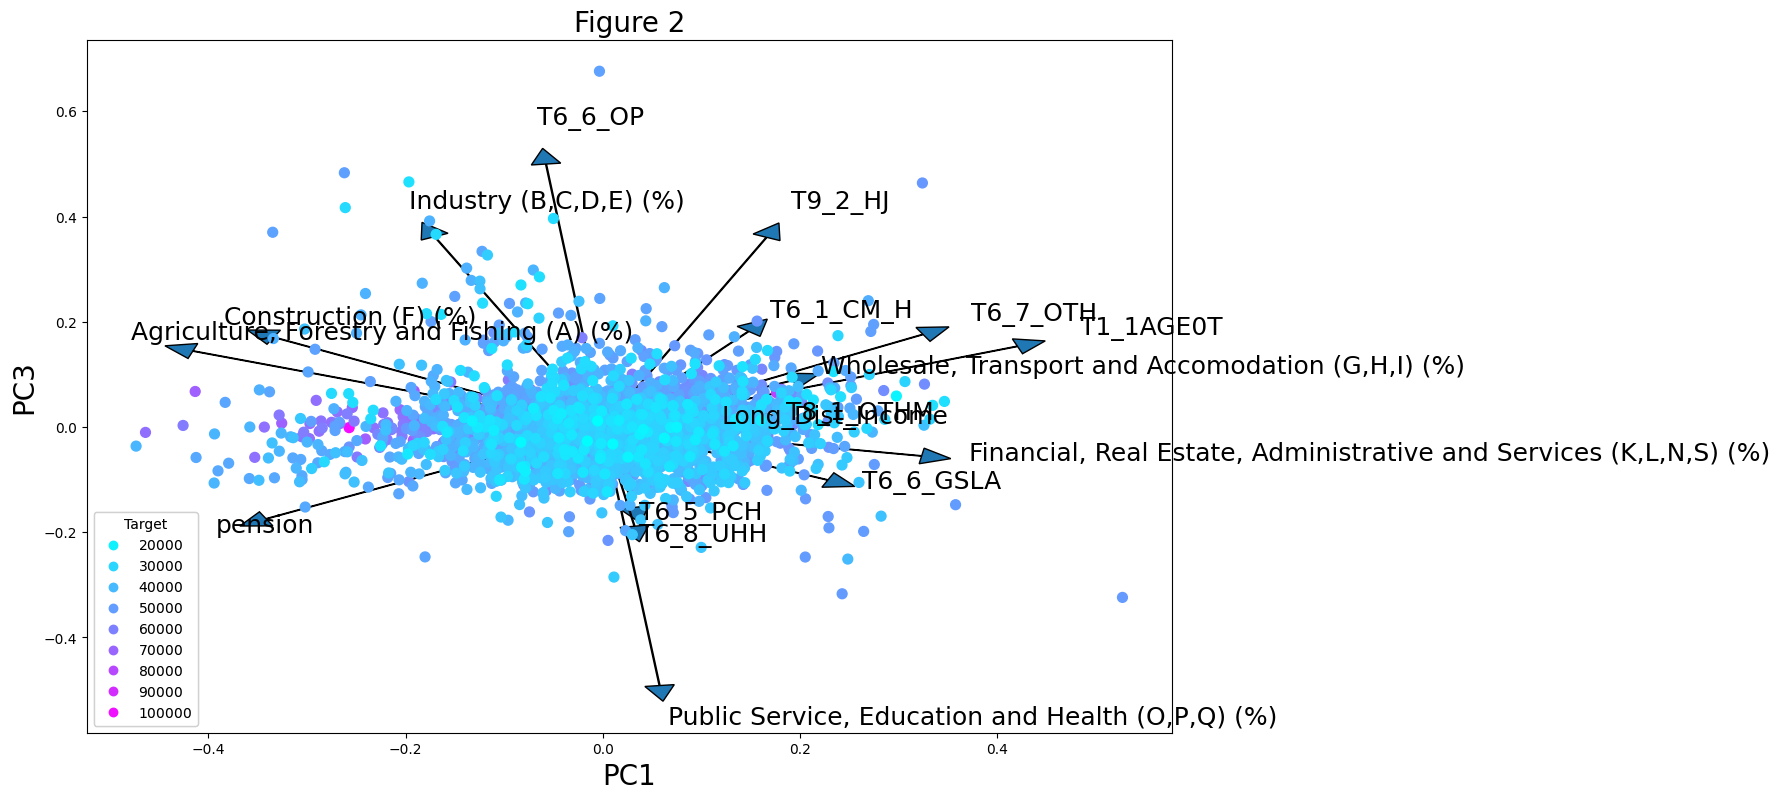

<Figure size 3000x350 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(14, 9))
for i, feature in enumerate(X.columns):
  ax.arrow(0, 0, pca01.components_[0, i],
             pca01.components_[2, i],
             head_width=0.03,
             head_length=0.03)
  ax.text(pca01.components_[0, i] * 1.15,
            pca01.components_[2, i] * 1.15,
            feature, fontsize = 18)

scatter = ax.scatter(xs * scalex,ys * scaley,
                     c=target,
                     s=50,
                     cmap='cool')

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC3', fontsize=20)
ax.set_title('Figure 2', fontsize=20)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Target")
ax.add_artist(legend1)
plt.figure()

<Figure size 3000x350 with 0 Axes>

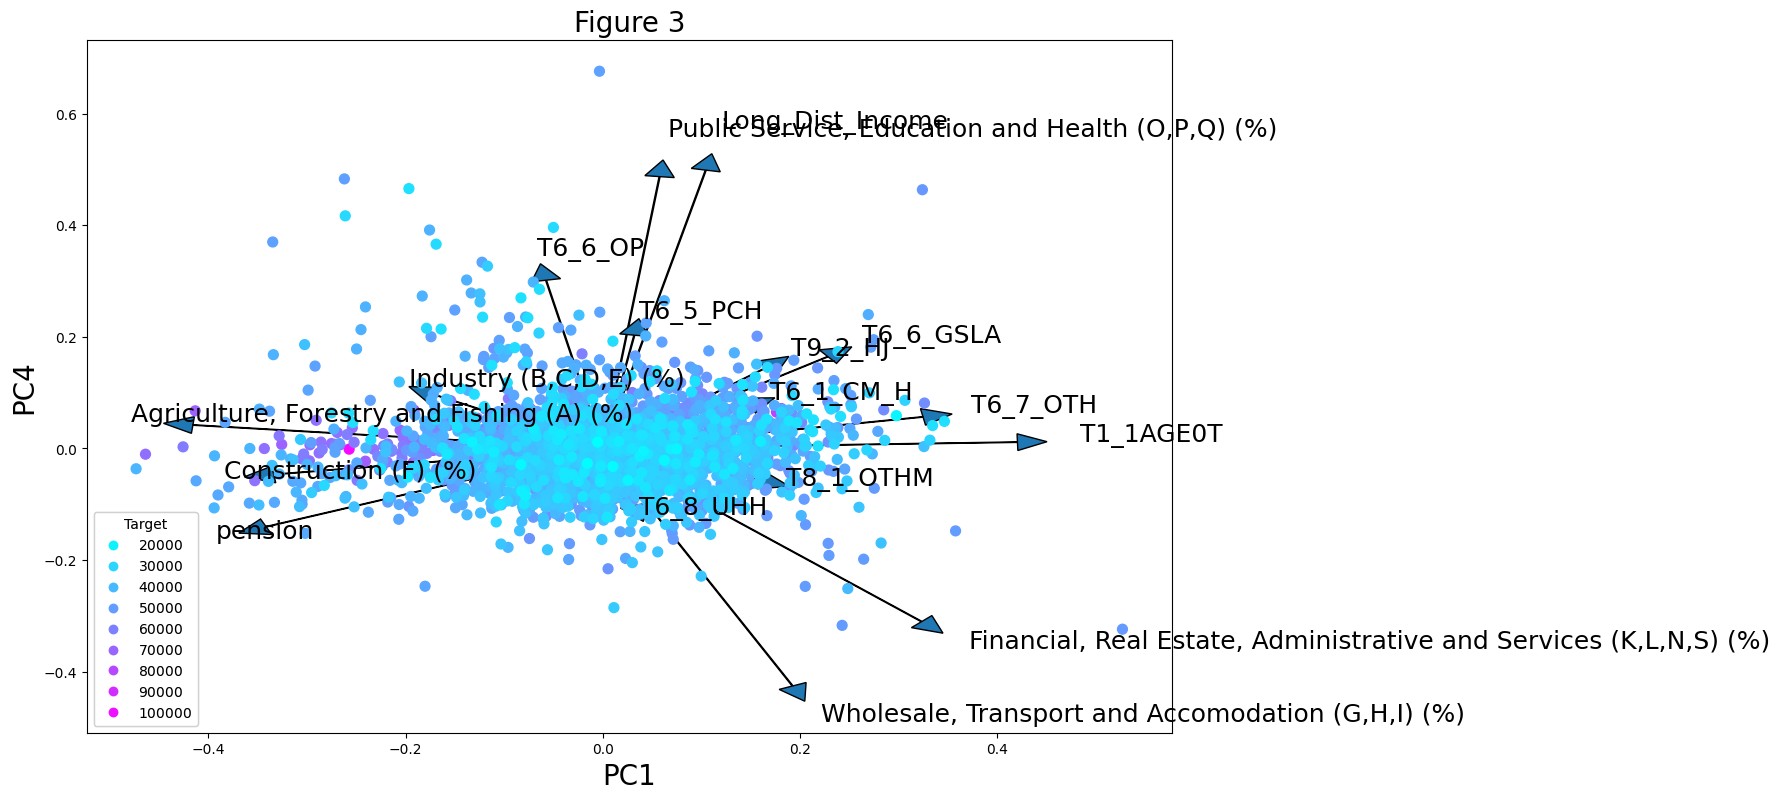

<Figure size 3000x350 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(14, 9))
for i, feature in enumerate(X.columns):
  ax.arrow(0, 0, pca01.components_[0, i],
             pca01.components_[3, i],
             head_width=0.03,
             head_length=0.03)
  ax.text(pca01.components_[0, i] * 1.15,
            pca01.components_[3, i] * 1.15,
            feature, fontsize = 18)

scatter = ax.scatter(xs * scalex,ys * scaley,
                     c=target,
                     s=50,
                     cmap='cool')

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC4', fontsize=20)
ax.set_title('Figure 3', fontsize=20)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Target")
ax.add_artist(legend1)
plt.figure()

<Figure size 3000x350 with 0 Axes>

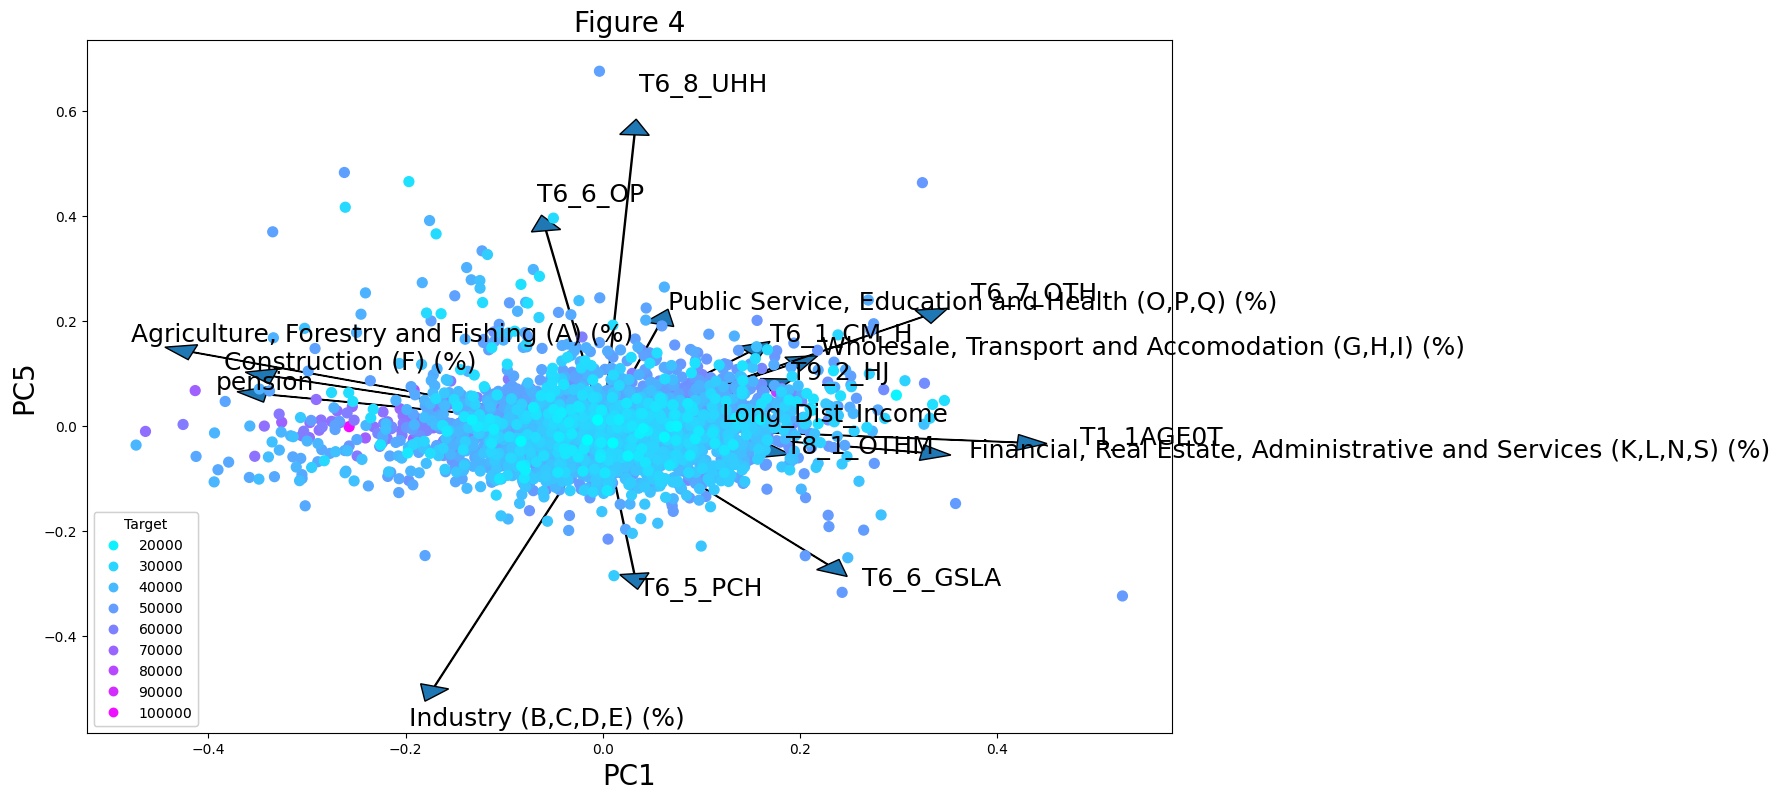

<Figure size 3000x350 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(14, 9))
for i, feature in enumerate(X.columns):
  ax.arrow(0, 0, pca01.components_[0, i],
             pca01.components_[4, i],
             head_width=0.03,
             head_length=0.03)
  ax.text(pca01.components_[0, i] * 1.15,
            pca01.components_[4, i] * 1.15,
            feature, fontsize = 18)

scatter = ax.scatter(xs * scalex,ys * scaley,
                     c=target,
                     s=50,
                     cmap='cool')

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC5', fontsize=20)
ax.set_title('Figure 4', fontsize=20)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Target")
ax.add_artist(legend1)
plt.figure()

Dataset that has been reshaped using PCA.

In [ ]:
final_df

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,gross_income
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411,105943
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427,101740
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155,96130
3,-0.503597,0.376286,1.708173,-0.760714,1.106229,0.332180,-0.290916,-0.863985,-0.265213,-0.135145,92189
4,-1.990278,-0.588371,0.811416,-0.787445,0.242310,0.129195,0.261898,0.537141,0.044215,0.142346,91199
...,...,...,...,...,...,...,...,...,...,...,...
2987,0.052193,1.073471,-0.879057,0.648652,-0.331555,-0.578063,0.570506,0.583443,-1.026981,1.275368,18314
2988,-0.205536,2.078856,0.162742,-0.866625,-0.455447,-0.448621,0.971416,0.372389,-1.100953,1.040353,17144
2989,0.902133,1.515067,-0.965671,0.104430,-0.507575,-0.440927,0.537016,0.085948,-0.752473,1.533488,16667
2990,1.035698,1.249995,-0.072999,-0.164216,-0.418337,-0.751090,-0.363675,-0.738844,-0.953695,0.772972,15687


PCA componenet break down.

In [ ]:
df

,pension,Long_Dist_Income,"Agriculture, Forestry and Fishing (A) (%)",Construction (F) (%),"Financial, Real Estate, Administrative and Services (K,L,N,S) (%)","Industry (B,C,D,E) (%)","Public Service, Education and Health (O,P,Q) (%)","Wholesale, Transport and Accomodation (G,H,I) (%)",T1_1AGE0T,T6_1_CM_H,T6_5_PCH,T6_6_GSLA,T6_6_OP,T6_7_OTH,T6_8_UHH,T8_1_OTHM,T9_2_HJ
0,-0.341426,0.104263,-0.415695,-0.333762,0.323123,-0.170633,0.057423,0.192296,0.420242,0.147693,0.031812,0.228031,-0.057690,0.324498,0.031995,0.161138,0.165880
1,0.256753,-0.359732,0.003069,0.177640,-0.374483,0.164247,0.141590,0.291703,0.111209,0.173095,0.434534,0.328934,-0.057437,0.109323,0.261320,0.134944,0.244248
2,-0.174558,0.005968,0.144427,0.170616,-0.055048,0.361726,-0.491372,0.088574,0.153316,0.181731,-0.152855,-0.100747,0.499706,0.175935,-0.188556,0.012381,0.360478
3,-0.140275,0.498894,0.042077,-0.046604,-0.310271,0.096257,0.487241,-0.425626,0.011354,0.076917,0.203052,0.164614,0.301588,0.056585,-0.102045,-0.057963,0.145214
4,0.060207,0.007589,0.140660,0.094527,-0.050670,-0.496101,0.193868,0.118282,-0.031256,0.140424,-0.281457,-0.264033,0.372186,0.208248,0.554809,-0.045959,0.076784
5,0.002569,-0.038014,0.086559,0.029172,0.018335,-0.237272,0.120755,-0.005838,0.001681,0.434623,0.075249,-0.292412,-0.025091,-0.359207,-0.301502,0.635315,0.121243
6,0.127843,0.036563,0.173263,0.321949,0.276944,-0.291113,-0.178355,-0.270018,0.093740,0.530629,0.127349,0.261354,-0.179037,0.059516,-0.103238,-0.401663,-0.004257
7,0.090801,-0.057026,0.265194,0.224479,0.109951,-0.073109,-0.108363,-0.449064,0.176745,-0.361360,-0.112559,0.233216,-0.071123,0.329794,0.090492,0.534318,-0.023732
8,-0.037684,0.167229,-0.128224,-0.059840,0.016223,0.364832,-0.182520,-0.110707,-0.131026,0.430951,0.043644,0.014075,0.063400,0.057751,0.407926,0.245489,-0.576754
9,-0.001233,-0.374604,0.105502,-0.182796,-0.272969,0.082620,0.283637,-0.016101,0.081968,0.262891,-0.576065,0.201726,-0.041301,0.204004,-0.314538,-0.051596,-0.244508


In [ ]:
import seaborn as sns

Feature contribution to Principal Componenets

<Axes: >

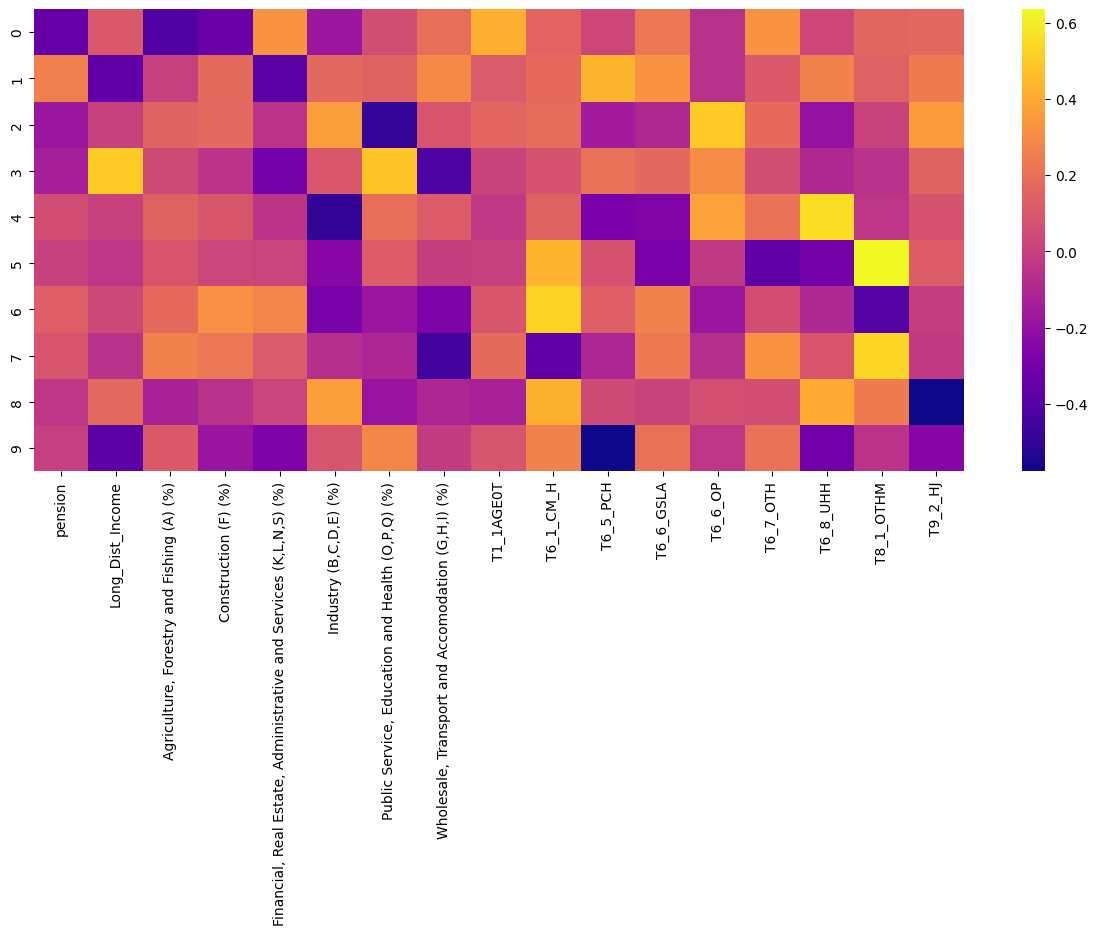

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df,cmap='plasma')

In [ ]:
final_df.to_csv('PC_data.csv')